In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
class Logistic_Regression:
  def __init__(self, lr=0.01, epoch=2000):
    self.lr = lr
    self.epoch = epoch
    self.w = []
    self.b = 0

  def initialize_weight(self, dim):
    w = np.random.normal(0, 1, (dim, 1))
    b = np.random.rand(1)
    return w, b

  def sigmoid(self, x):
    s = 1/(1 + np.exp(-x))
    return s

  def hypothesis(self, w, X, b):
    y_hat = self.sigmoid(np.matmul(X, w) + b)
    y_hat = np.squeeze(y_hat)
    return y_hat
  
  def predict(self, X):
    X = np.array(X)
    N = X.shape[0]

    Y_prediction = np.zeros(N)

    w = self.w.reshape(X.shape[1], 1)
    b = self.b

    y_hat = self.hypothesis(w, X, b)

    for i in range(len(y_hat)):
      if y_hat[i] >= 0.5:
        Y_prediction[i] = 1

    return Y_prediction

  def cost(self, y_hat, y, N):
    cost = -(1/N) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    cost = np.squeeze(cost)
    return cost

  def cal_gradient(self, w, y_hat, X, y):
    N = X.shape[1]
    delta_w = (1/N) * np.matmul(X.T, (y_hat - y))
    delta_b = (1/N) * np.sum(y_hat - y)
    grads = {"delta_w": delta_w,
             "delta_b": delta_b}
    return grads
  
  def gradient_position(self, w, b, X, Y):
    N = X.shape[0]
    y_hat = self.hypothesis(w, X, b)
    cost = self.cost(y_hat, Y, N)
    grads = self.cal_gradient(w, y_hat, X, Y)
    return grads, cost

  def gradient_descent(self, w, b, X, Y, print_cost = False):
    costs = []
    for i in range(self.epoch):
      grads, cost = self.gradient_position(w, b, X, Y)

      delta_w = grads["delta_w"].reshape(-1, 1)
      delta_b = grads["delta_b"]

      w -= self.lr * delta_w
      b -= self.lr * delta_b

      if i% 100 == 0:
        costs.append(cost)
      if print_cost and i % 100 == 0:
        print("Cost after iteration %i: %f"%(i, cost))
      
      params = {"w": w,
                "b": b}
    
    return params, costs

  def train_model(self, X_train, Y_train, X_test, Y_test, print_cost = False):
    dim = np.shape(X_train)[1]
    w, b = self.initialize_weight(dim)
    parameters, costs = self.gradient_descent(w, b, X_train, Y_train, print_cost=print_cost)

    self.w = parameters["w"]
    self.b = parameters["b"]

    Y_prediction_test = self.predict(X_test)
    Y_prediction_train = self.predict(X_train)

    train_score = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    test_score = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100
    print("test accuracy: {}%".format(test_score))
    result_dic = {"costs": costs,
                  "Y_prediction_test": Y_prediction_test,
                  "Y_prediction_train": Y_prediction_train,
                  "w": self.w,
                  "b": self.b,
                  "learning_rate": self.lr,
                  "train accuracy":train_score,
                  "test accuracy": test_score}
    return result_dic

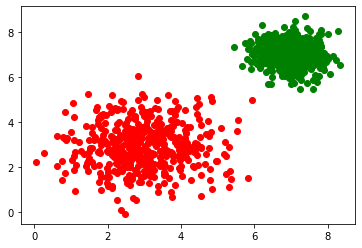

In [6]:
data = np.load("/content/drive/MyDrive/data2.npz")
X = data["x"]
Y = data["y"]

train_num = int(Y.shape[0] * 0.9)

X_train = X[:train_num, :]
Y_train = Y[:train_num]

X_test = X[train_num:, :]
Y_test = Y[train_num:]

plt.scatter(X_train[Y_train == 0][:, 0],
            X_train[Y_train == 0][:, 1], color = "red")
plt.scatter(X_train[Y_train == 1][:, 0],
            X_train[Y_train == 1][:, 1], color = "green")
plt.show()

In [7]:
cls = Logistic_Regression()
result_dic = cls.train_model(X_train, Y_train, X_test, Y_test)
result_dic["test accuracy"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in multiply


test accuracy: 100.0%


100.0